In [1]:
import sys
!{sys.executable} -m pip  install --quiet python-snappy pyarrow memray pandas watermark ipywidgets bs4 polars rich humanize matplotlib

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
You should consider upgrading via the '/usr/local/opt/python@3.9/bin/python3.9 -m pip install --upgrade pip' command.


Inspired by [Peter's notebook here](https://colab.research.google.com/drive/1TWa9L5NQE-cBYOpFvzwSu7Rjoy6QtFWw#scrollTo=OTEolvIk4Cmb)

In [2]:
from pyarrow import json
from pathlib import Path
import os

import pandas as pd
import humanize

from bs4 import BeautifulSoup
from rich import print

In [3]:
%load_ext memray

In [29]:
# total memory allocated for DF
latest_file = max(Path("memray-results/").glob("**/*.html"), key=os.path.getmtime)
soup = BeautifulSoup(latest_file.read_text())
stats = soup.find("div", {"id" : "statsModal"}).find("div", {"class" : "modal-body"})
print(stats.text)

Command line: /usr/local/lib/python3.9/site-packages/ipykernel_launcher.py -f 
/Users/vicki/Library/Jupyter/runtime/kernel-87e391e0-0452-4dc9-bbd9-48ccec32f39e.json
          Start time: 2023-01-11 13:15:56.652000
          End time: 2023-01-11 13:15:56.705000
          Total number of allocations: 974
          Total number of frames seen: 78
          Peak memory usage: 19.3 kB
          Python allocator: pymalloc

In [20]:
%%memray_flamegraph
df_json = pd.read_json('/Users/vicki/viberary/viberary/jsonparquet/src/main/resources/goodreads_books.json')

⠋ Processing allocation records... ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━   0% -:--:--

Results saved to memray-results/tmpclqskio7/flamegraph.html

In [21]:
# total memory allocated for DF
latest_file = max(Path("memray-results/").glob("**/*.html"), key=os.path.getmtime)
soup = BeautifulSoup(latest_file.read_text())
stats = soup.find("div", {"id" : "statsModal"}).find("div", {"class" : "modal-body"})
print(stats.text)

Command line: /usr/local/lib/python3.9/site-packages/ipykernel_launcher.py -f 
/Users/vicki/Library/Jupyter/runtime/kernel-87e391e0-0452-4dc9-bbd9-48ccec32f39e.json
          Start time: 2023-01-12 16:13:05.618000
          End time: 2023-01-12 16:13:34.124000
          Total number of allocations: 30
          Total number of frames seen: 47
          Peak memory usage: 55.2 GB
          Python allocator: pymalloc

In [37]:
%%memray_flamegraph
from pyarrow import json
df_pyarrow = json.read_json('/Users/vicki/viberary/viberary/jsonparquet/src/main/resources/goodreads_books.json')
df_pyarrow = df_pyarrow.to_pandas()

⠙ Processing allocation records... ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 100% 0:00:01

Results saved to memray-results/tmp28lr8lsk/flamegraph.html

In [38]:
# total memory allocated for DF
latest_file = max(Path("memray-results/").glob("**/*.html"), key=os.path.getmtime)
soup = BeautifulSoup(latest_file.read_text())
stats = soup.find("div", {"id" : "statsModal"}).find("div", {"class" : "modal-body"})
print(stats.text)

Command line: /usr/local/lib/python3.9/site-packages/ipykernel_launcher.py -f 
/Users/vicki/Library/Jupyter/runtime/kernel-87e391e0-0452-4dc9-bbd9-48ccec32f39e.json
          Start time: 2023-01-12 16:35:17.344000
          End time: 2023-01-12 16:37:22.167000
          Total number of allocations: 42194315
          Total number of frames seen: 76
          Peak memory usage: 45.0 GB
          Python allocator: pymalloc

In [5]:
%%memray_flamegraph
df_parquet = pd.read_parquet('/Users/vicki/viberary/viberary/jsonparquet/src/main/resources/goodreads.parquet', engine='pyarrow')

Output()

Output()

Results saved to memray-results/tmp_hx3jvr4/flamegraph.html

In [34]:
# total memory allocated for DF
latest_file = max(Path("memray-results/").glob("**/*.html"), key=os.path.getmtime)
soup = BeautifulSoup(latest_file.read_text())
stats = soup.find("div", {"id" : "statsModal"}).find("div", {"class" : "modal-body"})
print(stats.text)

Command line: /usr/local/lib/python3.9/site-packages/ipykernel_launcher.py -f 
/Users/vicki/Library/Jupyter/runtime/kernel-87e391e0-0452-4dc9-bbd9-48ccec32f39e.json
          Start time: 2023-01-12 16:30:36.757000
          End time: 2023-01-12 16:32:20.668000
          Total number of allocations: 12185306
          Total number of frames seen: 115
          Peak memory usage: 45.3 GB
          Python allocator: pymalloc

In [2]:
histo = df_pyarrow.groupby('publication_year').size()
plt.figure();
histo.plot.bar(); plt.axhline(0, color='k')

NameError: name 'df_pyarrow' is not defined

In [23]:
%%memray_flamegraph
df_parquet = pd.read_parquet('/Users/vicki/Downloads/spark-3.3.1-bin-hadoop3/goodreads_schema.parquet', engine='pyarrow')

Output()

Output()

Results saved to memray-results/tmpw84d73e5/flamegraph.html

In [20]:
df_parquet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2360655 entries, 0 to 2360654
Data columns (total 29 columns):
 #   Column                Dtype  
---  ------                -----  
 0   asin                  object 
 1   authors               object 
 2   average_rating        float64
 3   book_id               object 
 4   country_code          object 
 5   description           object 
 6   edition_information   object 
 7   format                object 
 8   image_url             object 
 9   is_ebook              object 
 10  isbn                  object 
 11  isbn13                object 
 12  kindle_asin           object 
 13  language_code         object 
 14  link                  object 
 15  num_pages             float64
 16  popular_shelves       object 
 17  publication_day       float64
 18  publication_month     float64
 19  publication_year      float64
 20  publisher             object 
 21  ratings_count         float64
 22  series                object 
 23  similar

In [19]:
df_parquet['average_rating'] = pd.to_numeric(df_parquet['average_rating'],errors="coerce")
df_parquet['num_pages'] = pd.to_numeric(df_parquet['num_pages'],errors="coerce")
df_parquet['publication_day'] = pd.to_numeric(df_parquet['publication_day'],errors="coerce")
df_parquet['publication_month'] = pd.to_numeric(df_parquet['publication_month'],errors="coerce")
df_parquet['publication_year'] = pd.to_numeric(df_parquet['publication_year'],errors="coerce")
df_parquet['ratings_count'] = pd.to_numeric(df_parquet['ratings_count'],errors="coerce")
df_parquet['text_reviews_count'] = pd.to_numeric(df_parquet['text_reviews_count'],errors="coerce")

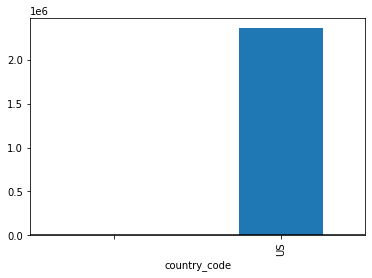

In [21]:
import matplotlib.pyplot as plt


histo = df_parquet.groupby('country_code').size()
plt.figure();
histo.plot.bar(); plt.axhline(0, color='k')

In [ ]:
histo = df_parquet.groupby('averag_rating').size()
plt.figure();
histo.plot.bar(); plt.axhline(0, color='k')

In [ ]:
df_parquet.describe()